# Measuring quantum radiation reaction in laser-electron-beam collisions

T G Blackburn 2015 Plasma Phys.Control.Fusion 57 075012

Notebook: Óscar Amaro, December 2022 @ GoLP-EPP

In [2]:
# numpy
import numpy as np
np.random.seed(19680801)
from numpy.random import default_rng
rng = default_rng()

import pandas as pd

# import functions
from numpy import log, log10, sin, cos, exp, sqrt, pi

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm

# progress bar
from tqdm.notebook import tqdm
from tqdm import trange
from time import sleep
from tqdm import tqdm

## Figure 3

In [3]:
# import data extracted using WebPlotDigitizer
Odeltax = pd.read_csv( "@data/deltax.txt", header=None, sep=' ')
Odeltay = pd.read_csv( "@data/deltay.txt", header=None, sep=' ')
Otheta = pd.read_csv( "@data/theta.txt", header=None, sep=' ')

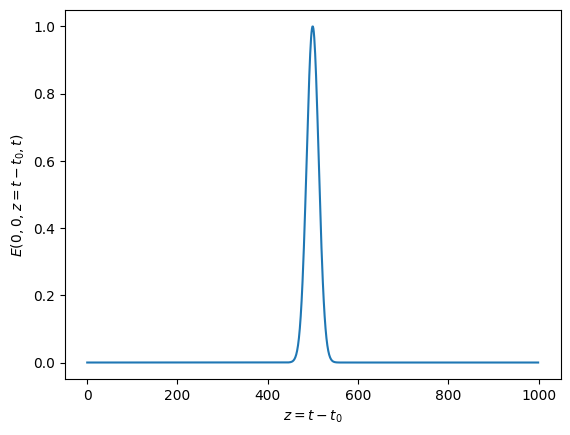

In [218]:
def a0eff(x,y,z,lbd,W0):
    # z is propagation axis
    rho = sqrt(x**2 + y**2);
    return 1/sqrt(1+(z/zR)**2) * exp(-(rho/W0)**2 / (1+(z/zR)**2) )

def Efld(x,y,z,t,t0):
    # z is propagation axis
    # t[\mu m]
    W0 = 2; #[\mu m]
    tausig = 9/1.66511; #[\mu m] fwhm = 9 \mu m
    return a0eff(x,y,z,lbd,W0) * exp(-0.5*((t+z-t0)/tausig)**2)

Nsmpl = int(1e4)
tdim = int(1e3)
t0 = 100

lbd = 0.8; #[\mu m]
W0 = 2; #[\mu m]
zR = pi * W0**2 / lbd;

sigpll = 3.8; #[\mu m]
sigprp = 4.2; #[\mu m]
xdist0 = sigprp*rng.standard_normal(Nsmpl) #[\mu m]
ydist0 = sigprp*rng.standard_normal(Nsmpl) #[\mu m]
zdist0 = sigpll*rng.standard_normal(Nsmpl) - t0 #[\mu m]

deltaxlst = np.linspace(0,150,10)
deltaylst = np.linspace(0,10,len(deltaxlst))
thetalst = np.linspace(0,pi/2,len(deltaxlst))
tlst = np.linspace(0,2*t0,tdim)
dt = tlst[1]-tlst[0]

# the field along the ballistic particle aligned with the optical axis
plt.plot( Efld(0,0,tlst-t0,tlst,t0) )
plt.xlabel(r'$z=t-t_0$')
plt.ylabel(r'$E(0,0,z=t-t_0,t)$')
plt.show()

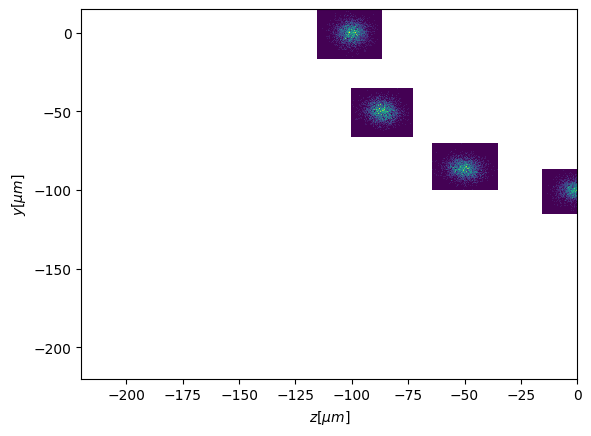

In [219]:
# rotating the initial particle distribution and propagation with angle 
t = t0/3*0

theta = 0
zdist2 = cos(theta)*zdist0 - sin(theta)*ydist0 + t*cos(theta)
ydist2 = sin(theta)*zdist0 + cos(theta)*ydist0 + t*sin(theta)
plt.hist2d(zdist2, ydist2, 100)

theta = pi/6
zdist2 = cos(theta)*zdist0 - sin(theta)*ydist0 + t*cos(theta)
ydist2 = sin(theta)*zdist0 + cos(theta)*ydist0 + t*sin(theta)
plt.hist2d(zdist2, ydist2, 100)

theta = pi/3
zdist2 = cos(theta)*zdist0 - sin(theta)*ydist0 + t*cos(theta)
ydist2 = sin(theta)*zdist0 + cos(theta)*ydist0 + t*sin(theta)
plt.hist2d(zdist2, ydist2, 100)

theta = pi/2
zdist2 = cos(theta)*zdist0 - sin(theta)*ydist0 + t*cos(theta)
ydist2 = sin(theta)*zdist0 + cos(theta)*ydist0 + t*sin(theta)
plt.hist2d(zdist2, ydist2, 100)

plt.xlim([-220,0])
plt.ylim([-220,15])
plt.xlabel(r'$z[\mu m]$')
plt.ylabel(r'$y[\mu m]$')
plt.show()

In [220]:
def funOdeltax(deltax):
    zdist = zdist0 + deltax
    Eflddist = np.zeros_like(zdist)
    for t in tlst:
        zdist = zdist + dt
        Eflddist = Eflddist + Efld(xdist0,ydist0,zdist,t,t0)
    return np.sum(Eflddist)
Odeltaxlst = np.zeros_like(deltaxlst)
for i in tqdm(range(len(deltaxlst))):
    Odeltaxlst[i] = funOdeltax(deltaxlst[i])
    
def funOdeltay(deltay):
    ydist = ydist0 + deltay
    zdist = zdist0
    Eflddist = np.zeros_like(zdist)
    for t in tlst:
        zdist = zdist + dt
        Eflddist = Eflddist + Efld(xdist0,ydist,zdist,t,t0)
    return np.sum(Eflddist)
Odeltaylst = np.zeros_like(deltaylst)
for i in tqdm(range(len(deltaylst))):
    Odeltaylst[i] = funOdeltay(deltaylst[i])

def funOtheta(theta):
    zdist = cos(theta)*zdist0 - sin(theta)*ydist0
    ydist = sin(theta)*zdist0 + cos(theta)*ydist0
    Eflddist = np.zeros_like(zdist)
    for t in tlst:
        zdist = zdist + dt*cos(theta)
        ydist = zdist + dt*sin(theta)
        Eflddist = Eflddist + Efld(xdist0,ydist,zdist,t,t0)
    return np.sum(Eflddist)
Othetalst = np.zeros_like(thetalst)
for i in tqdm(range(len(thetalst))):
    Othetalst[i] = funOtheta(thetalst[i])

100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.05it/s]


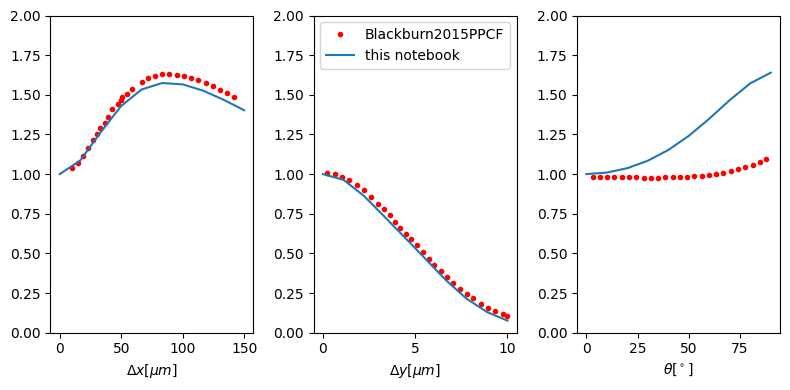

In [221]:
fig, axes = plt.subplots(1, 3, figsize=(8,4))
axes[0].plot(Odeltax[0], Odeltax[1], 'r.', label=r'')
axes[0].plot(deltaxlst, Odeltaxlst/Odeltaxlst[0], '-')
axes[0].set_xlabel(r'$\Delta x[\mu m]$')
axes[1].plot(Odeltay[0], Odeltay[1], 'r.', label=r'Blackburn2015PPCF')
axes[1].plot(deltaylst, Odeltaylst/Odeltaylst[0], '-', label=r'this notebook')
axes[1].set_xlabel(r'$\Delta y[\mu m]$')
axes[1].legend()
axes[2].plot(Otheta[0], Otheta[1], 'r.')
axes[2].plot(thetalst/(pi/2)*90, Othetalst/Othetalst[0], '-')
axes[2].set_xlabel(r'$\theta[^\circ]$')
for i in range(3):
    axes[i].set_ylim([0,2])
plt.tight_layout()
plt.show()